In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# This is my Case Study on Completion of the Google Data Analytics Professional Certificate
The format of this case study will follow the six Google steps in Data Analytics;
1.Ask 2.Prepare 3.Process 4.Analyse 5.Share 6.Act

This case study is focused on infromation provided by Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, the team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.


# Stage 1: Ask
In this analysis I am therefore attempting, to identify the differences between members and casual riders. With these insights the business can create a targeted marketing campaign to convert casual riders into members.

The key stakeholders in this task are Lily Moreno: The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.

Stage 2: Prepare
The data for this task is organised in quarters from 2015-2020 Q1 then monthly from over a period April 2020 and March 2021. I will be using the monthly data because it is the current data for the task.

Verifying the data’s integrity; this is an example of first party data; collected by the company itself, therefore I believe in the reliability of the data.
I chose to use R for this analysis because of the size of the dataset, once loaded I can see it contains over 3million observations, something that excel may struggle to cope with.

Now I know what data I am using for the analysis I can begin to load the packages required for analsyis and the data into R and create a data frame.

In [2]:

library(dplyr)
library(readr)
library(tidyr)
library(tidyverse)
library(lubridate)
library(scales)

In [3]:
apr20 <- read_csv("../input/cyclistic/202004-divvy-tripdata/202004-divvy-tripdata.csv")
may20 <- read_csv("../input/cyclistic/202005-divvy-tripdata/202005-divvy-tripdata.csv")
jun20 <- read_csv("../input/cyclistic/202006-divvy-tripdata/202006-divvy-tripdata.csv")
jul20 <- read_csv("../input/cyclistic/202007-divvy-tripdata/202007-divvy-tripdata.csv")
aug20 <- read_csv("../input/cyclistic/202008-divvy-tripdata/202008-divvy-tripdata.csv")
sep20 <- read_csv("../input/cyclistic/202009-divvy-tripdata/202009-divvy-tripdata.csv")
oct20 <- read_csv("../input/cyclistic/202010-divvy-tripdata/202010-divvy-tripdata.csv")
nov20 <- read_csv("../input/cyclistic/202011-divvy-tripdata/202011-divvy-tripdata.csv")
dec20 <- read_csv("../input/cyclistic/202012-divvy-tripdata/202012-divvy-tripdata.csv")
jan21 <- read_csv("../input/cyclistic/202101-divvy-tripdata/202101-divvy-tripdata.csv")
feb21 <- read_csv("../input/cyclistic/202102-divvy-tripdata/202102-divvy-tripdata.csv")
mar21 <- read_csv("../input/cyclistic/202103-divvy-tripdata/202103-divvy-tripdata.csv")

Now we want to combine all the data into a single dataframe

In [4]:
df <- rbind(apr20, may20, jun20, jul20, aug20, sep20, oct20, nov20, dec20, jan21, feb21, mar21)
glimpse(df)

# Stage 3: Prepare
This is where we begin the cleaning process. I begin by removing any observation with NA’s, and also add some extra columns for additional analysis.

In [5]:
df <- na.omit(df)
head(df)


Now that looks a little cleaner, let's add some columns for analysis 

In [6]:
df$started_at <- as.POSIXct(df$started_at)
df$ended_at <- as.POSIXct(df$ended_at)
df$duration <- difftime(df$ended_at, df$started_at, units = "mins")
df$duration <- as.numeric(df$duration)


In [7]:
View(df)

After havinng a look at the datafram I can see that there are a negative durations, we want to remove these from our analysis

In [8]:
df <- df[df$duration >0, ]
glimpse(df)

In [9]:
df$Day_of_week <- weekdays(as.Date(df$started_at)) 
df$month<- months(df$started_at)
df$start_hour <- as.numeric(format(df$started_at, "%H"))

# Stage 4: Analysis

Now we have verified that the data is clean is ready to use we can begin analysis.

In [10]:
ggplot(data = df) + geom_bar(mapping = aes(fill = member_casual, x = factor(Day_of_week, levels = c("Monday", "Tuesday", 
                                                                              "Wednesday", "Thursday",
                                                                              "Friday", "Saturday",
                                                                              "Sunday")))) +
  facet_wrap(~member_casual, ncol = 1) + labs(x = "Day of the Week", title = "Rides per Day") + scale_y_continuous(labels = comma)

This first visualisation is a bar graph showing the number of rides taken by day over the period April 2020-March2021, by both members in blue and casual riders in orange.

From this first graph we can see that Saturday is the most popular day for both members and casual riders. The members are more consistent users throughout the week compared to casual riders, this could suggest members use the bikes as one of their main modes of transport. Casual riders may use the bikes in a more leisurely fashion; as the most popular days for casual riders coincide with the end of the working week.

I now want to create subsets of the data frame in order to more closely analsyse the difference between members and casual riders 

In [11]:
df_casual <- subset(df, member_casual == "casual")
df_member <- subset(df, member_casual == "member")

In [12]:
mean_cas_day <- df_casual %>% 
  group_by(Day_of_week) %>% 
  summarise(avgjourney_day = mean(duration))

mean_mem_day <- df_member %>% 
  group_by(Day_of_week) %>% 
  summarise(avgjourney_day = mean(duration))

In [13]:
ggplot(data = NULL, aes(x= factor(Day_of_week, levels = c("Monday", "Tuesday", "Wednesday",
                                                          "Thursday", "Friday", "Saturday",
                                                          "Sunday")), y= avgjourney_day, group = 1)) + 
  geom_line(data = mean_mem_day, col = "#00BFC4", show.legend = "true") +
  geom_line(data = mean_cas_day, col = "#F8766D", show.legend = "true") +
  labs(x = "Day of the Week", y = "Average Journey Time (minutes)", title = "Average Journey Time by Day")

This visualisation is a line graph showing the average journey time of members in blue and casual riders in orange.

This first thing I notice when looking at this is that casual riders on average use the bikes for a much longer period then members, ranging from 42-52minutes initially decreasing from Monday to Tuesday, before increasing as the week goes on. Members on average use the bikes for less than 20 minutes per day, staying relatively flat Monday-Thursday at around 10 minutes a day before slightly increasing at the end of the week.

This consistency among members increases the strength of my previous suggestion that members use the bikes as a means of getting from A-B, whereas casual riders may use the bikes in a more leisurely fashion.

In [14]:
ggplot(data = df) + 
  geom_bar(position = "dodge", mapping = aes(x=start_hour, fill = member_casual)) + 
  labs (x = "Ride Start Hour", y = "No. of Rides", title = "Bike Rental Start Time")


This bar graph shows the hours of the day bikes are taken out.

The most popular time for both members and casual riders is 17:00, followed by 18:00. And that between the hours 21:00-04:00, bikes are used more by casual riders than members.
The most popular times for bikes is also traditionally the end of the working day, 5-7pm. But one interesting factor is that a similar spike in bike usage is not seen between 7-9am traditionally the start of a working day. This could suggest one of two things; first perhaps the bikes are not used as a mode of transport to and from work. Second it may suggest that riders would rather not work up a sweat before going to work.


Now I want to make use of the location data provided

In [15]:
library(ggplot2)
install.packages("ggmap")
libary("ggmap)

In [ ]:
library("ggmap")

In [ ]:
pop_start_member <- sort(table(df_member$start_station_id), decreasing = TRUE)[1:3]
pop_start_member <- data.frame(pop_start_member)
df_member2 <- df_member %>% 
  select(start_station_id, start_lat, start_lng)
View(df_member2)
joined_member <- merge(x=pop_start_member, y=df_member2, by.x= "Var1", by.y = "start_station_id", all.x = TRUE)
joined_member <- joined_member[!duplicated(joined_member$Var1),]

pop_start_casual <- sort(table(df_casual$start_station_id), decreasing = TRUE)[1:3]
pop_start_casual <- data.frame(pop_start_casual)
df_casual2 <- df_casual %>% 
  select(start_station_id, start_lat, start_lng)
joined_casual <- merge(x= pop_start_casual, y=df_casual2, by.x = "Var1", by.y =
                         "start_station_id", all.x = TRUE)
joined_casual <- joined_casual[!duplicated(joined_casual$Var1),]

In [ ]:
bbox <- c(
  left = -87.75,
  bottom = 41.83,
  right = -87.575,
  top = 41.95
)


map <- get_stamenmap(bbox = chi_bb, zoom = 11, maptype = "terrain")
ggmap(map)

ggmap(map) + geom_point(data=joined_member, mapping = aes(x=start_lng, y=start_lat, col = "blue", size = 2.5)) +
  geom_point(data=joined_casual, mapping = aes(x=start_lng, y=start_lat, col = "red", size = 2.5)) +
  theme(legend.position="none")

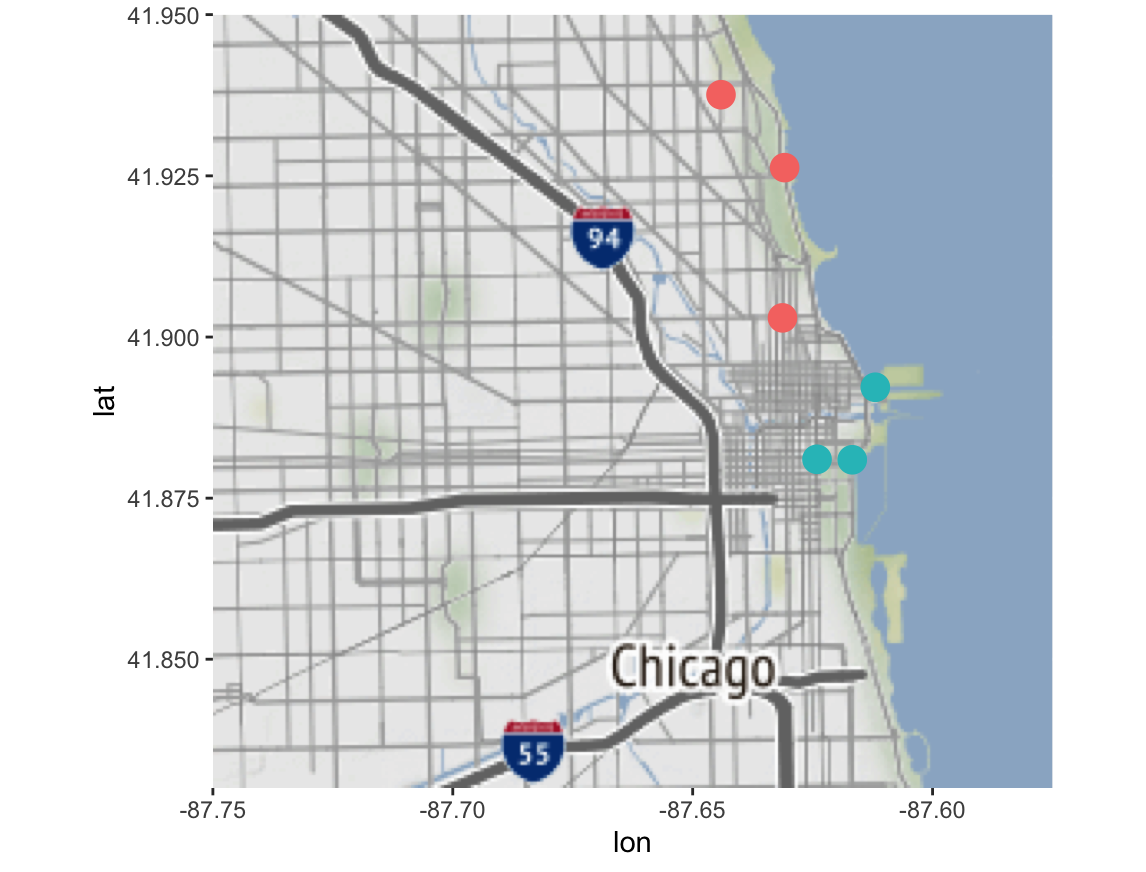

From this final visual, shows a map of the Chicago area, highlighting in blue the most popular starting locations for members in blue, and casual riders in orange.

From this map we can see that members most commonly start their journeys in the city, built up areas. This does make sense considering earlier we saw that the average journey time for members is less than 20 minutes. This suggests that members may use the bikes to get between destinations in the city.

We can see that casual riders are more likely to start their journeys in less built up areas near green spaces. Again  reinforcing the earlier inference that casual riders may use the bikes on a more leisurely basis, perhaps even for light exercise.

# Stage 5: Share 
Sharing my conclusions:

The data is telling me that members casual riders are more likely to use the bikes in a more leisurely fashion. Most commonly  on the weekends for longer periods of time compared to members. 
Members however use the bikes as a ‘mode of transport’, consistently throughout the week, making short trips from A-B often in the city.

In order to convert casual riders to members, .
1. I would target the casual riders that act like members, 
    This could be by placing adverts on the docking stations most used by members 
    Targeting the casual riders that make shorter trips and ensuring that these adverts are in place during the weekdays.
2. Promote the use of bikes in a leisurely fashion, 
    Cyclisitc could promote the bikes as a form of exercise encouraging casual riders to take out memberships to improve their fitness.